# Weekly assignment 2
**Kuki Heiligers** 


### How lineair regression works
> If there is a lineair regression, it means that there is a relationship between a independent, and a dependent variable. A straight line goes through some points and what you try to do is to get the line as accurate as possible. There can be a negative of positive relation, based on the independent variable. That is the one you can change. 

In [11]:

import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
working_directory = os.getcwd()
print(working_directory)

path = working_directory + '/Assignment 2 - data Mashable.csv'
df = pd.read_csv(path)
df.head()








/Users/kukiheiligers/Documents/Weekly2


id                                                url  n_tokens_title  \
0   1  http://mashable.com/2013/10/29/ashton-kutcher-...              10   
1   2  http://mashable.com/2014/09/08/mashies-sept-19...               9   
2   3  http://mashable.com/2013/02/01/hello-kitty-roc...              11   
3   4  http://mashable.com/2014/02/06/add-us-on-snapc...               8   
4   5  http://mashable.com/2014/01/07/lindsey-vonn-wi...               9   

   n_tokens_content  num_imgs  num_videos  average_token_length  \
0               821        12           0              4.518879   
1               489         6           0              5.040900   
2               131         0           1              4.877863   
3               556         2           0              4.974820   
4               880        18           0              4.928409   

   data_channel_is_lifestyle  data_channel_is_entertainment  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   data_channel_is_bus  ...  weekday_is_friday  weekday_is_saturday  \
0                    0  ...                  0                    0   
1                    0  ...                  0                    0   
2                    0  ...                  1                    0   
3                    1  ...                  0                    0   
4                    0  ...                  0                    0   

   weekday_is_sunday  is_weekend  global_subjectivity  \
0                  0           0             0.439379   
1                  0           0             0.300454   
2                  0           0             0.575486   
3                  0           0             0.327220   
4                  0           0             0.507709   

   global_sentiment_polarity  title_subjectivity  title_sentiment_polarity  \
0                   0.082486            0.666667                     0.375   
1                   0.027715            0.000000                     0.000   
2                   0.259120            0.000000                     0.000   
3                   0.134424            0.000000                     0.000   
4                   0.109256            0.000000                     0.000   

   shares  shares_log  
0    2100    3.322219  
1     274    2.437751  
2    1500    3.176091  
3    2000    3.301030  
4    6000    3.778151  

[5 rows x 27 columns]

In [13]:
df = df.dropna()


In [14]:
df.head()

id                                                url  n_tokens_title  \
0   1  http://mashable.com/2013/10/29/ashton-kutcher-...              10   
1   2  http://mashable.com/2014/09/08/mashies-sept-19...               9   
2   3  http://mashable.com/2013/02/01/hello-kitty-roc...              11   
3   4  http://mashable.com/2014/02/06/add-us-on-snapc...               8   
4   5  http://mashable.com/2014/01/07/lindsey-vonn-wi...               9   

   n_tokens_content  num_imgs  num_videos  average_token_length  \
0               821        12           0              4.518879   
1               489         6           0              5.040900   
2               131         0           1              4.877863   
3               556         2           0              4.974820   
4               880        18           0              4.928409   

   data_channel_is_lifestyle  data_channel_is_entertainment  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   data_channel_is_bus  ...  weekday_is_friday  weekday_is_saturday  \
0                    0  ...                  0                    0   
1                    0  ...                  0                    0   
2                    0  ...                  1                    0   
3                    1  ...                  0                    0   
4                    0  ...                  0                    0   

   weekday_is_sunday  is_weekend  global_subjectivity  \
0                  0           0             0.439379   
1                  0           0             0.300454   
2                  0           0             0.575486   
3                  0           0             0.327220   
4                  0           0             0.507709   

   global_sentiment_polarity  title_subjectivity  title_sentiment_polarity  \
0                   0.082486            0.666667                     0.375   
1                   0.027715            0.000000                     0.000   
2                   0.259120            0.000000                     0.000   
3                   0.134424            0.000000                     0.000   
4                   0.109256            0.000000                     0.000   

   shares  shares_log  
0    2100    3.322219  
1     274    2.437751  
2    1500    3.176091  
3    2000    3.301030  
4    6000    3.778151  

[5 rows x 27 columns]

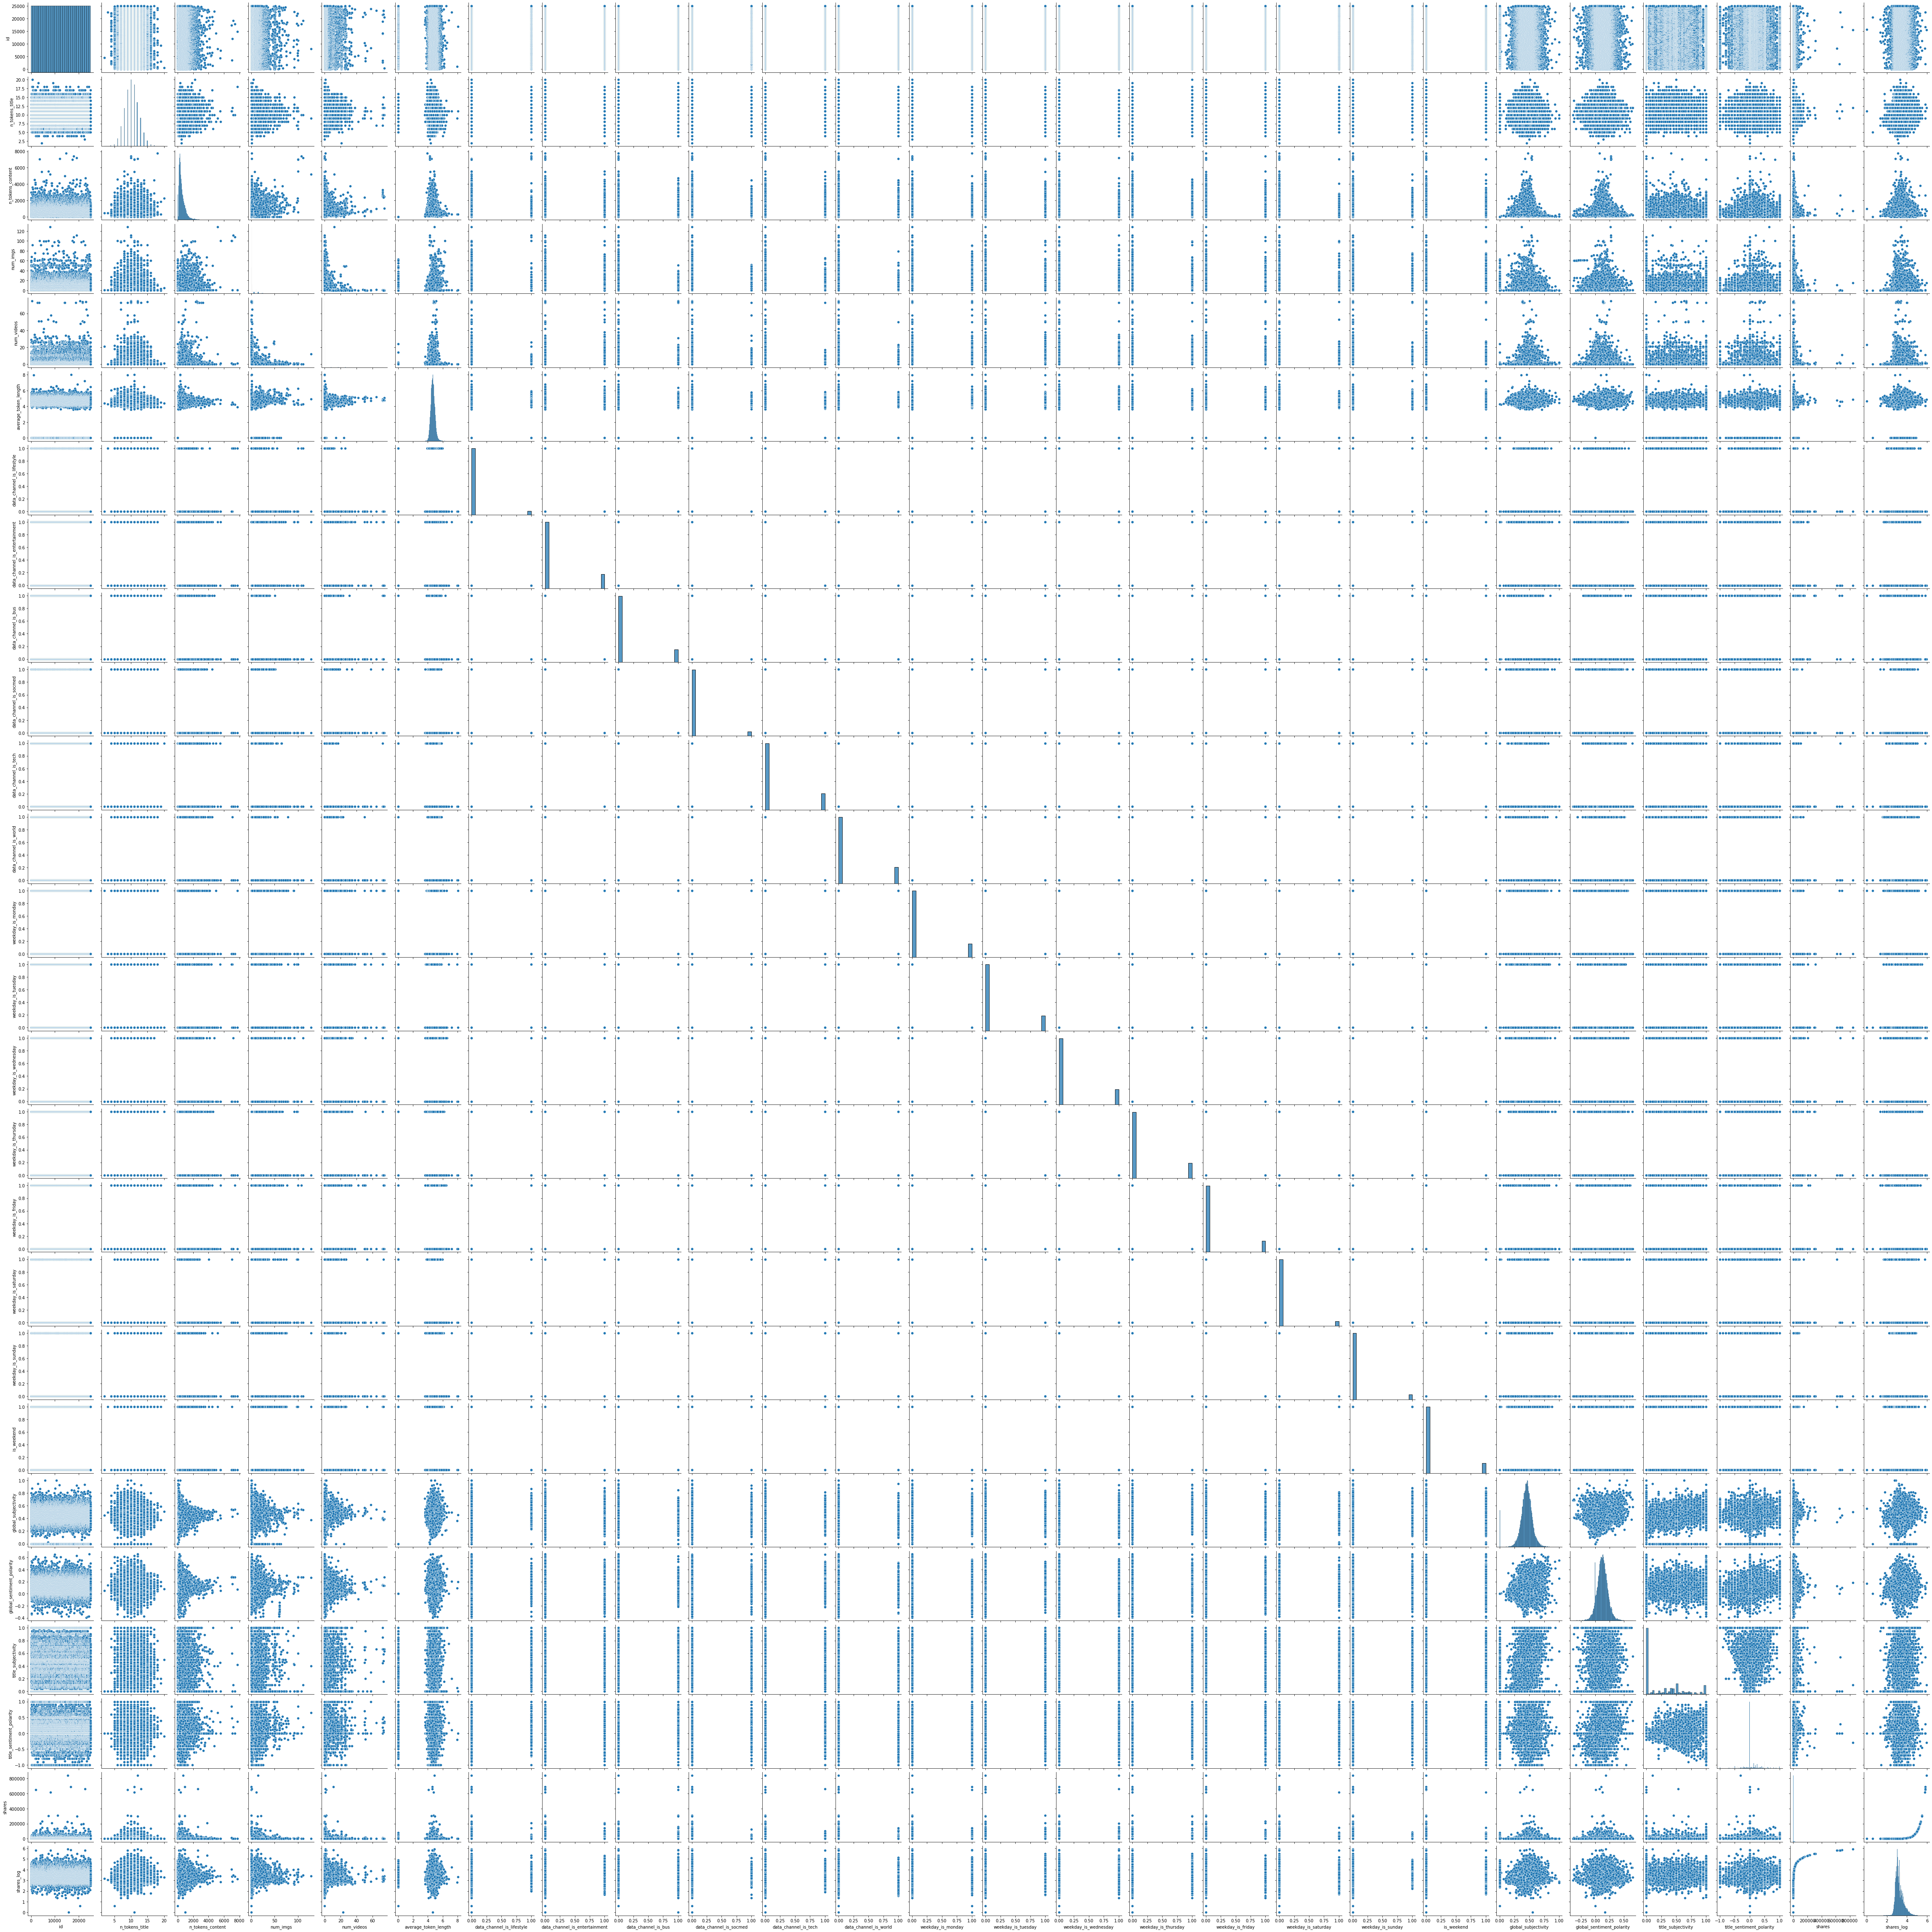

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
y = df['shares_log']
X = df.loc[:, 'n_tokens_title':'shares_log']
X.index = df['id']
X.head()


n_tokens_title  n_tokens_content  num_imgs  num_videos  \
id                                                           
1               10               821        12           0   
2                9               489         6           0   
3               11               131         0           1   
4                8               556         2           0   
5                9               880        18           0   

    average_token_length  data_channel_is_lifestyle  \
id                                                    
1               4.518879                          0   
2               5.040900                          0   
3               4.877863                          0   
4               4.974820                          0   
5               4.928409                          0   

    data_channel_is_entertainment  data_channel_is_bus  \
id                                                       
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    1   
5                               0                    0   

    data_channel_is_socmed  data_channel_is_tech  ...  weekday_is_friday  \
id                                                ...                      
1                        0                     1  ...                  0   
2                        0                     0  ...                  0   
3                        0                     0  ...                  1   
4                        0                     0  ...                  0   
5                        0                     1  ...                  0   

    weekday_is_saturday  weekday_is_sunday  is_weekend  global_subjectivity  \
id                                                                            
1                     0                  0           0             0.439379   
2                     0                  0           0             0.300454   
3                     0                  0           0             0.575486   
4                     0                  0           0             0.327220   
5                     0                  0           0             0.507709   

    global_sentiment_polarity  title_subjectivity  title_sentiment_polarity  \
id                                                                            
1                    0.082486            0.666667                     0.375   
2                    0.027715            0.000000                     0.000   
3                    0.259120            0.000000                     0.000   
4                    0.134424            0.000000                     0.000   
5                    0.109256            0.000000                     0.000   

    shares  shares_log  
id                      
1     2100    3.322219  
2      274    2.437751  
3     1500    3.176091  
4     2000    3.301030  
5     6000    3.778151  

[5 rows x 25 columns]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
X_train.head()

n_tokens_title  n_tokens_content  num_imgs  num_videos  \
id                                                              
20922               7               141         0           1   
4486                9               392         9           0   
17756               9               622         1           0   
4705               12               251        23           1   
13494               8               940        13           2   

       average_token_length  data_channel_is_lifestyle  \
id                                                       
20922              4.560284                          0   
4486               4.732143                          0   
17756              4.710611                          0   
4705               4.669323                          0   
13494              4.511702                          0   

       data_channel_is_entertainment  data_channel_is_bus  \
id                                                          
20922                              0                    0   
4486                               0                    0   
17756                              0                    1   
4705                               0                    0   
13494                              0                    0   

       data_channel_is_socmed  data_channel_is_tech  ...  weekday_is_friday  \
id                                                   ...                      
20922                       0                     0  ...                  0   
4486                        0                     0  ...                  0   
17756                       0                     0  ...                  1   
4705                        0                     0  ...                  0   
13494                       0                     0  ...                  0   

       weekday_is_saturday  weekday_is_sunday  is_weekend  \
id                                                          
20922                    0                  1           1   
4486                     0                  0           0   
17756                    0                  0           0   
4705                     0                  0           0   
13494                    0                  0           0   

       global_subjectivity  global_sentiment_polarity  title_subjectivity  \
id                                                                          
20922             0.451711                   0.230736            0.500000   
4486              0.476976                   0.078816            0.100000   
17756             0.488495                   0.263511            0.000000   
4705              0.545746                   0.052758            0.454545   
13494             0.507042                   0.063513            0.750000   

       title_sentiment_polarity  shares  shares_log  
id                                                   
20922                  0.136364    1600    3.204120  
4486                   0.100000    1400    3.146128  
17756                  0.000000    3100    3.491362  
4705                   0.136364     822    2.914872  
13494                  0.000000    9300    3.968483  

[5 rows x 25 columns]

In [19]:

lm = LinearRegression() 
model = lm.fit(X_train, y_train) 

In [20]:
coef = pd.DataFrame(X.columns.values, lm.coef_) 

In [21]:
coef

0
 5.506424e-17                 n_tokens_title
 2.448830e-18               n_tokens_content
 7.445348e-17                       num_imgs
-6.324901e-17                     num_videos
-1.979607e-15           average_token_length
 8.685390e-17      data_channel_is_lifestyle
-1.257674e-16  data_channel_is_entertainment
 2.634290e-16            data_channel_is_bus
-7.808269e-16         data_channel_is_socmed
 2.946722e-16           data_channel_is_tech
-1.775228e-16          data_channel_is_world
 4.454430e-17              weekday_is_monday
-1.846005e-16             weekday_is_tuesday
-2.852861e-16           weekday_is_wednesday
-8.031065e-19            weekday_is_thursday
 2.261850e-16              weekday_is_friday
 7.464158e-17            weekday_is_saturday
 3.292462e-16              weekday_is_sunday
 3.226592e-16                     is_weekend
 3.897844e-16            global_subjectivity
-7.611469e-16      global_sentiment_polarity
-7.639421e-16             title_subjectivity
-3.476420e-16       title_sentiment_polarity
-1.683634e-21                         shares
 1.000000e+00                     shares_log

In [22]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

1.0

In [23]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2.0929142052072515e-15

/Users/kukiheiligers/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


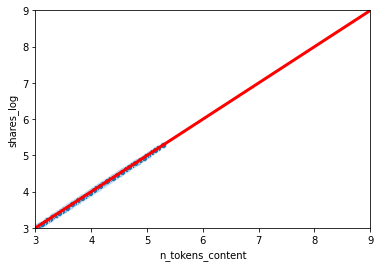

In [25]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('n_tokens_content')
plt.ylabel('shares_log')
plt.xlim([3,9]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,9])
plt.plot([3, 9], [3, 9], color='red', lw=3) #Plot a diagonal length
plt.show()

# For both the first and second weekly assignment, I really have no clue of what I am doing... I hope it will be clear later and I can check the outcomes of both of the weekly assignments.